# New York City Property Sales Analysis

## Introduction

On this Notebook, an Analysis of 12-Month period of Property Sales in New York City is done. For this, the "NYC Property Sales" published on Kaggle is used, enriched with location data obtained geocoding the Zip Codes using Open Street Map. This is my first published Notebook, hope you like it.

## Context

Some years ago, I had the opportunity to visit New York in one of my vacations, and I got really amazed by how places were so different from anything I had seen before. All the streets, parks, skyscrapers, stores and restaurants seems to compose the uniqueness of the City that never Sleeps. So, wandering a little bit on the streets was enough to ask myself how much does it cost to live in a place like that. 

Specially considering the well-known high density of buildings on the city, we may expect find interesting things by first analysing the sales prices of properties on New York. That's the purpose of this Notebook. Here, a 12-month dataset of Property Sales is analysed, involving the following features:

* Location Features: Borough, Neighborhood, Block, Lot, Address, Zip Code and Geographical Coordinates;
* Class and Category of the Building;
* Physical Properties of the Building: Year Built, Land and Gross Square Feet, Residential and Comercial Units;
* Sales Information: Sales Price and Sales Date.

By analyzing these features, we can define some goals for the Analysis.

## Objectives

A good way to define some goals to be reached by an analysis, it's to define some questions, based on the features available, to be answered during the experiments done to the data. For this work, we can try to answer:

* How the Sales Price vary according to the type of Building?
* How the Sales Price vary with Time?
* What is the Average Sales Price on different locations of the City?

## Libraries

Here all the libraries used throghout this notebook are imported.

In [1]:
import numpy as np 
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns 
sns.set_style('darkgrid')


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Read Data

Here the processed dataset is read and an initial analysis of the data is done.

In [5]:
data = pd.read_csv('nyc-notebook.csv',index_col=0)

In [6]:
data.shape

(57390, 20)

In [7]:
data.head()

,Borough,Neighborhood,Building Class Category,Tax Class At Present,Ease-Ment,Building Class At Present,Address,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date,X Coordinate,Y Coordinate
3,Manhattan,Alphabet City,07 Rentals - Walkup Apartments,2B,,C4,154 East 7Th Street,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,-74.006015,40.712728
6,Manhattan,Alphabet City,07 Rentals - Walkup Apartments,2B,,C4,210 Avenue B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,-74.006015,40.712728
12,Manhattan,Alphabet City,09 Coops - Walkup Apartments,2,,C6,"327 East 3 Street, 1C",10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06,-74.006015,40.712728
13,Manhattan,Alphabet City,09 Coops - Walkup Apartments,2,,C6,"327 East 3 Street, 1C",10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10,-74.006015,40.712728
14,Manhattan,Alphabet City,09 Coops - Walkup Apartments,2,,C6,"327 East 3 Street, 3A",10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28,-74.006015,40.712728


## Inital Analysis

Let's start the Analysis with some simple analysis of key variables of the dataset. First let's check the distributuion for the prices.

In [148]:
plot_data = data['Sale Price']

Text(927134.6094267294, 3000, 'Mean:827134.61')

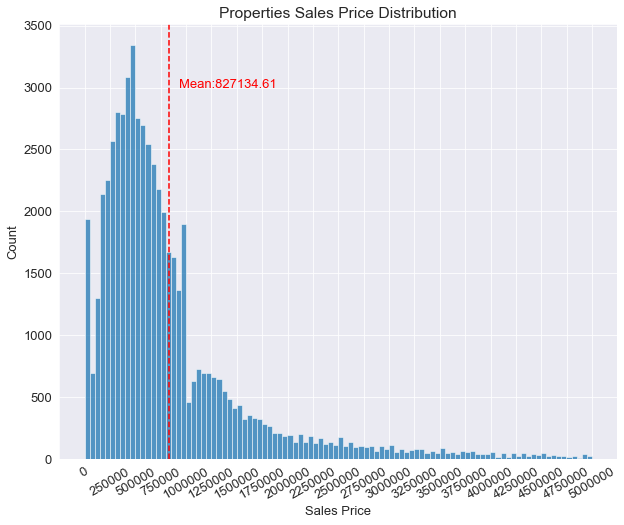

In [149]:
plt.figure(figsize=(10,8))
plotd = sns.histplot(plot_data,bins=100)

tick_spacing=250000 
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.ticklabel_format(axis='both',style='plain')
plt.xticks(rotation=30) 
plt.xlabel('Sales Price')
plt.title('Properties Sales Price Distribution')

ylim = plotd.get_ylim()
plotd.plot([plot_data.mean(),plot_data.mean()], plotd.get_ylim(),color='red',ls='--',)
plotd.set_ylim(ylim)
plotd.text(plot_data.mean() + 100000, 3000,'Mean:' + str(round(plot_data.mean(),2)), fontsize=13,color='red')

The distribution presents a skewed behaviour toward less priced properties, with a long tail towards more valuable samples. Let's check the distribution of Properties by Borough to check any imbalances in data.

In [150]:
plot_data = data[['Borough','Sale Price']].groupby(by='Borough').count()
plot_data = plot_data.reset_index()
plot_data.columns =  ['Borough','Counts']
plot_data = plot_data.sort_values('Counts',ascending=False)

Text(0.5, 1.0, 'Properties by Borough')

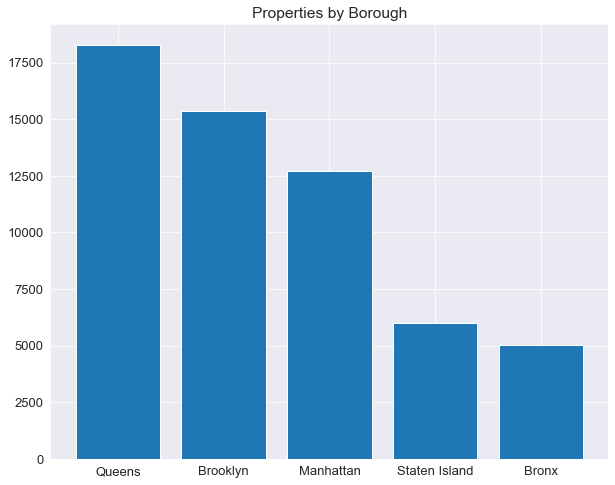

In [151]:
plt.figure(figsize=(10,8))
plt.bar(x = plot_data['Borough'],height=plot_data['Counts'])
plt.title('Properties by Borough')

Queen, Brooklyn and Manhattan concentrate a high level of properties compared to other Boroughs. It's also a interesting to analyse the distribution of properties by Building Class Category.

In [152]:
plot_data = data[['Building Class Category','Sale Price']].groupby(by='Building Class Category').count()
plot_data = plot_data.reset_index()
plot_data.columns =  ['Building Class','Counts']
plot_data = plot_data.sort_values('Counts')

Text(0.5, 1.0, 'Properties by Building Class')

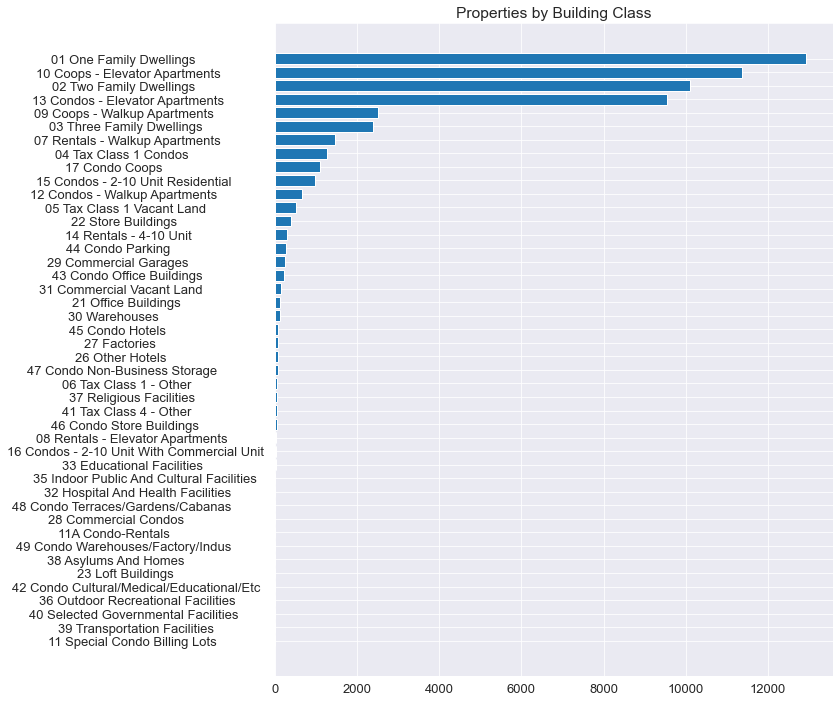

In [153]:
plt.figure(figsize=(10,12))
plt.barh(y = plot_data['Building Class'],width=plot_data['Counts'])
plt.title('Properties by Building Class')

It seems that the properties presented on the dataset are highly concentraded on Apartments and Family Dwellings. What about the area of the properties?

In [154]:
plot_data = data[data['Gross Square Feet'] > 0]['Gross Square Feet']

Text(3610.779545696162, 2500, 'Mean:3110.78')

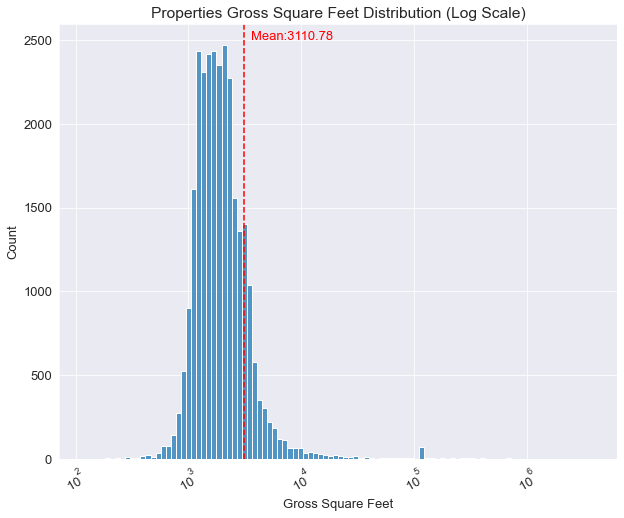

In [155]:
plt.figure(figsize=(10,8))
plotd = sns.histplot(plot_data,bins=100,log_scale=True)

plt.xticks(rotation=30) 
plt.xlabel('Gross Square Feet')
plt.title('Properties Gross Square Feet Distribution (Log Scale)')

ylim = plotd.get_ylim()
plotd.plot([plot_data.mean(),plot_data.mean()], plotd.get_ylim(),color='red',ls='--',)
plotd.set_ylim(ylim)
plotd.text(plot_data.mean() + 500, 2500,'Mean:' + str(round(plot_data.mean(),2)), fontsize=13,color='red')

As there's some big values involved, a logarithmic scale is used, from which is possible to see a asymmetric distribution with a long tail. The Mean of the distribution is shown on the red vertical line.

## More Deep Analysis

Ok, so after the Initial Analysis section, which focused more on the distribution of important single variables, on this section more focused explorations are done, trying to answer the questions defined on the Objectives section.

### Prices Variation by Building Class

The first question considered is how Sales Prices vary according to building type. Let's first separate the appropriate data.

In [156]:
plot_data = data[['Building Class Category','Residential Units','Commercial Units','Tax Class At Time Of Sale','Sale Price']]

As the initial step here, let's first plot the Sales Price by Building Class. As there's some types with small numbers of samples, this analysis will be limited to the 15 most common building types on this dataset.

In [157]:
selected_class = plot_data['Building Class Category'].value_counts().index[:15]

In [158]:
plot_data = plot_data[plot_data['Building Class Category'].isin(selected_class)]

Text(0.5, 1.0, 'Sales Price Distribution by Building Class')

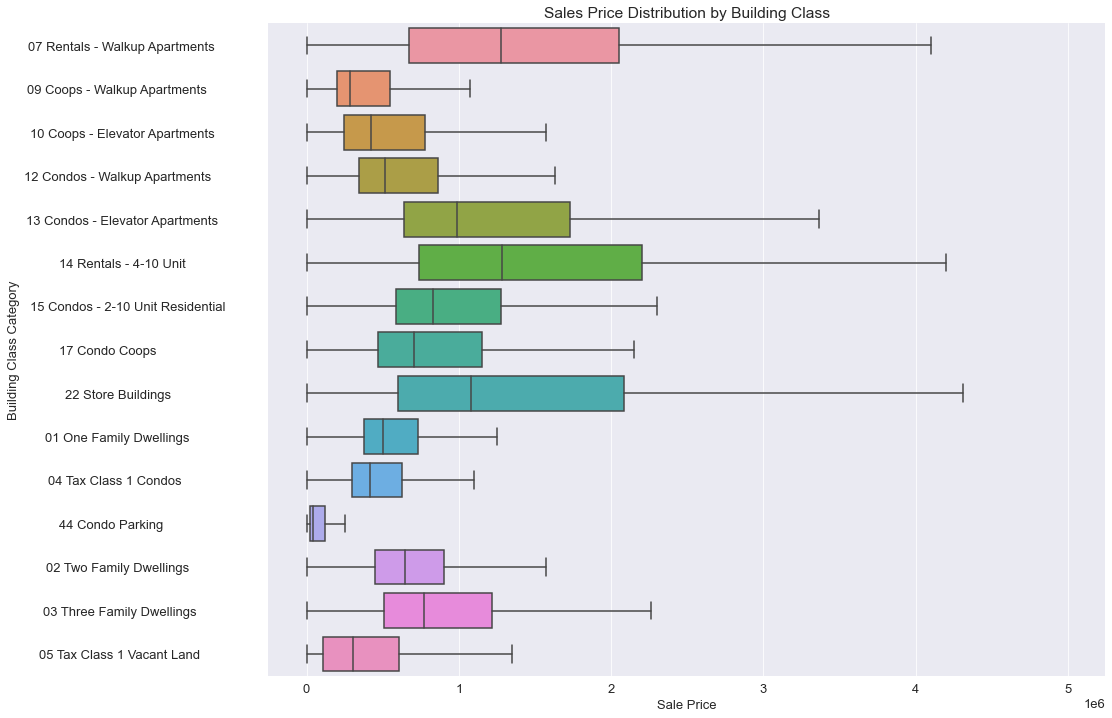

In [159]:
plt.figure(figsize=(15,12))
sns.boxplot(y='Building Class Category',x='Sale Price',data=plot_data,orient='h',fliersize=0)
sns.despine(trim=True, left=True)
plt.title('Sales Price Distribution by Building Class')

There's not a significant difference between the classes on this plot, but three of the classes presented stands out for higher means and variances, which are "Rentals - Walkup Apartments", "Rentals - 4-10 Unit" and "Store Buildings". 

### Prices Variation with Time

As mentioned earlier, the dataset contains infomration about the date of the sale registered. So, let's try to catch some information of that.

In [160]:
time_data = data[['Sale Date','Sale Price']]
time_data.head()

,Sale Date,Sale Price
3,2016-09-23,3936272.0
6,2016-09-23,3192840.0
12,2016-09-06,1.0
13,2017-03-10,499000.0
14,2017-04-28,10.0


Since it's possible to have more than one sale per day, let's group the sales by day and obtain the mean of each day.

In [161]:
time_data = time_data.groupby('Sale Date').mean()
time_data = time_data.reset_index().rename({'index':'Sale Date'})
time_data.head()

,Sale Date,Sale Price
0,2016-09-01,756209.469534
1,2016-09-02,595217.375000
2,2016-09-03,10.000000
3,2016-09-05,875000.000000
4,2016-09-06,840752.011429


Text(0.5, 1.0, 'Sales Price by Date')

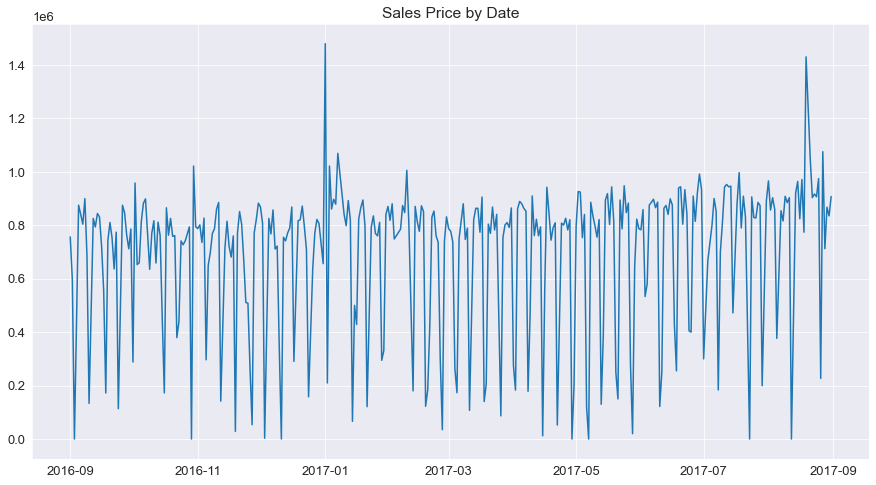

In [162]:
plt.figure(figsize=(15,8))
plt.plot(time_data['Sale Date'],time_data['Sale Price'])
plt.title('Sales Price by Date')

Despite not having a clear trend, there's a strong seasonality on the data. Let's try to catch this on a Autocorrelation plot.

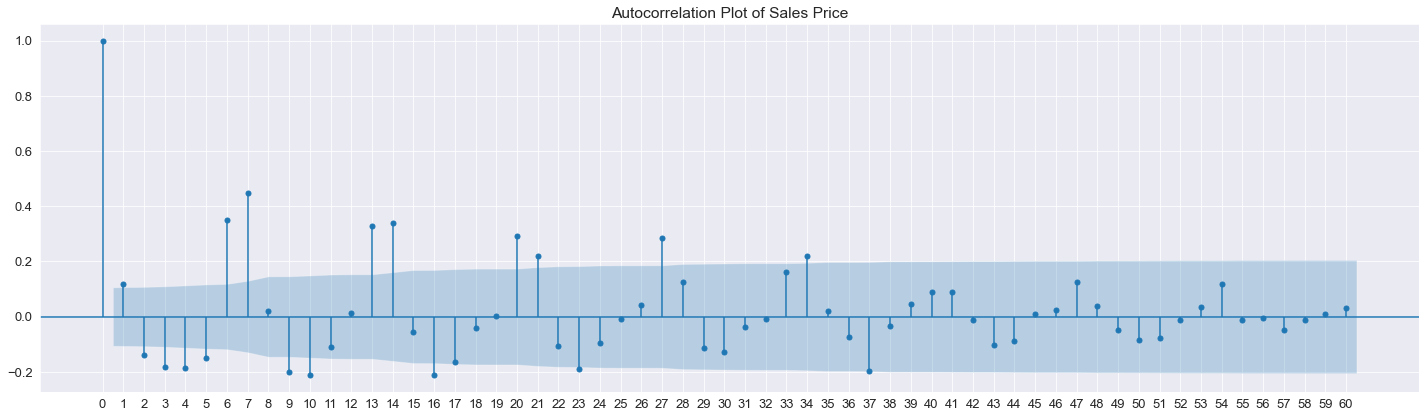

In [163]:
lags = 60
plt.rc("figure", figsize=(20,6))
fig = plot_acf(time_data['Sale Price'],lags=lags,title='Autocorrelation Plot of Sales Price')
x_ticks = plt.xticks(range(lags+1))
plt.tight_layout()

It seems there's a more proeminent correlation in 6-7 days periods, which may indicate that prices vary regularly along the week. Let's try to visualize that.

In [164]:
time_data['Sale Week Day Name'] = time_data['Sale Date'].map(lambda x: x.strftime("%A"))
time_data['Sale Week Day Number'] = time_data['Sale Date'].map(lambda x: x.weekday())

In [165]:
week_data = time_data.groupby('Sale Week Day Name').mean()
week_data = week_data.reset_index().rename({'index':'Sale Week Day Name'})
week_data = week_data.sort_values('Sale Week Day Number')
week_data

,Sale Week Day Name,Sale Price,Sale Week Day Number
1,Monday,793504.123102,0.0
5,Tuesday,837927.987824,1.0
6,Wednesday,824765.873014,2.0
4,Thursday,826797.818868,3.0
0,Friday,811912.687809,4.0
2,Saturday,277719.066667,5.0
3,Sunday,390712.697479,6.0


Text(0.5, 1.0, 'Mean Sales Price by Day of Week')

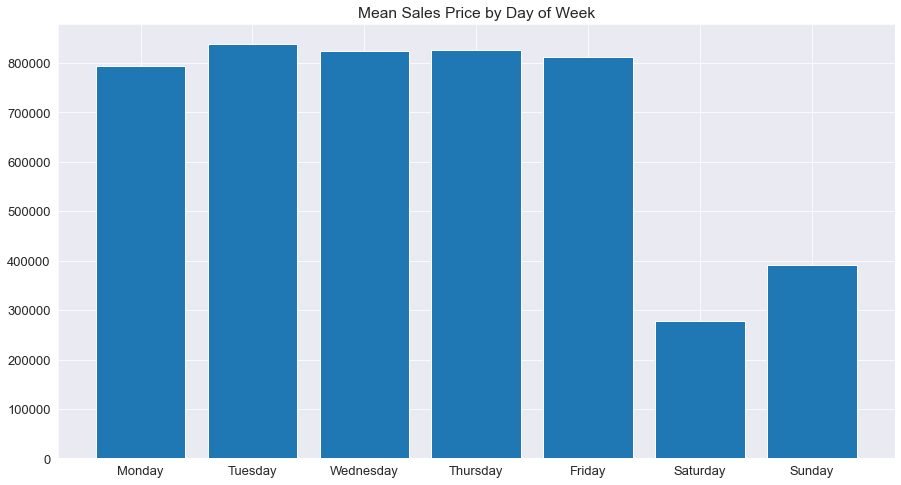

In [166]:
plt.figure(figsize=(15,8))
plt.bar(x = week_data['Sale Week Day Name'],height=week_data['Sale Price'])
plt.title('Mean Sales Price by Day of Week')

So, it just seems that on the weekeend the average price of sales have a big drop, while during the week it remains practically constant, which appears to be some natural behaviour of this kind of sales on Saturday and Sunday.

Another important time related analysis to be done involves the price variation with the age of the building. Obviously, it's expected that older buildings are less valued, but for how much?

In [167]:
age_data = data[['Year Built','Sale Price','Sale Date']]
age_data['Sale Year'] = age_data['Sale Date'].map(lambda x: x.year)
age_data.head()

C:\Users\andre_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year Built,Sale Price,Sale Date,Sale Year
3,1913,3936272.0,2016-09-23,2016
6,1920,3192840.0,2016-09-23,2016
12,1920,1.0,2016-09-06,2016
13,1920,499000.0,2017-03-10,2017
14,1920,10.0,2017-04-28,2017


As seen earlier, this dataset involves sales between September of 2016 and September of 2017. So, the age of the buildings shoud be calculated taking the year of sale as a reference.

In [168]:
age_data['Age'] = age_data['Sale Year'] - age_data['Year Built']
age_data = age_data.groupby('Age').mean()

C:\Users\andre_\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
age_data = age_data[age_data.index <= 300]

Text(0.5, 1.0, 'Mean Sales Price by Age of Property')

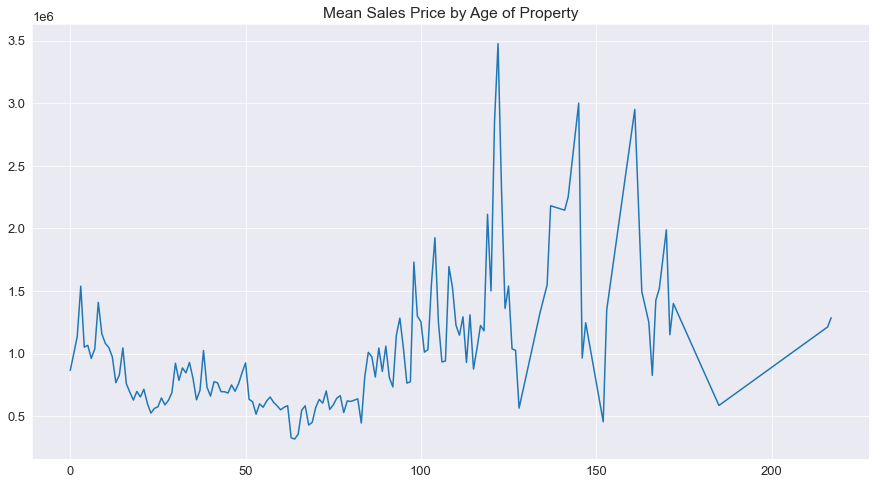

In [170]:
plt.figure(figsize=(15,8))
plt.plot(age_data.index,age_data['Sale Price'])
plt.title('Mean Sales Price by Age of Property')

Surprisingly, there's a high variation of prices around buildings with 150 years old. By doing some comparisons, it feels that there's a significant difference on these buildings related to the Gross Square Feet, as can be seen on the next plot.

In [171]:
old_priced_buildings = data[(2017 - data['Year Built'] >= 125) & (2017 - data['Year Built'] <= 175)]

In [172]:
old_gross_area_mean = old_priced_buildings['Gross Square Feet'].mean()
general_gross_area_mean = data['Gross Square Feet'].mean()

Text(0.5, 1.0, 'Average Gross Square Feet of Properties Comparison')

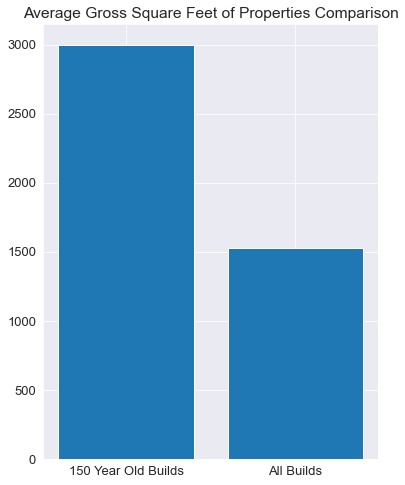

In [173]:
plt.figure(figsize=(6,8))
plt.bar(x=['150 Year Old Builds','All Builds'],height=[old_gross_area_mean,general_gross_area_mean])
plt.title('Average Gross Square Feet of Properties Comparison')

### Prices Variation with Location

Last, but not least, probably the most practical question to answer is about the sales price variation with the location of the properties. To study this last question, an interactive app created with Streamlit is proposed, which can be checked (here)[].